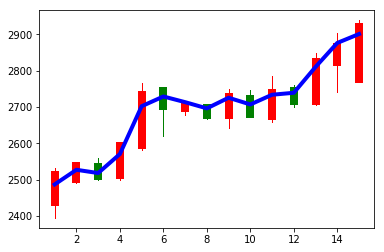

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
date = np.linspace(1,15,15)
endPrice = np.array([2511.90,2538.26,2510.68,2591.66,2732.98,2701.69,2701.29,
                     2678.67,2726.50,2681.50,2739.17,2715.07,2823.58,2864.90,2919.08])
beginPrice = np.array([2438.71,2500.88,2534.95,2512.52,2594.04,2743.26,2697.47,
                       2696.24,2678.23,2722.13,2674.93,2744.13,2717.46,2823.73,2777.40])
highPrice = np.array([2531.69,2539.01,2560.11,2600.34,2765.11,2744.69,2715.42,
                     2699.85,2750.00,2745.87,2785.50,2760.14,2849.40,2904.77,2938.65])
lowPrice = np.array([2394.22,2490.92,2498.65,2500.01,2580.77,2620.85,2678.98,
                    2665.57,2640.86,2675.44,2658.03,2701.01,2705.46,2740.64,2770.98])
plt.figure()
for i in range(0,15):
    dateOne = np.zeros([2])
    dateOne[0] = i;
    dateOne[1] = i;
    priceOne = np.zeros([2])
    priceOne[0] = beginPrice[i]
    priceOne[1] = endPrice[i]
    priceTwo = np.zeros([2])
    priceTwo[0] = highPrice[i]
    priceTwo[1] = lowPrice[i]
    if endPrice[i]>beginPrice[i]:
        plt.plot(dateOne+1,priceOne,'r',lw=8)
        plt.plot(dateOne+1,priceTwo,'r',lw=1)
    else:
        plt.plot(dateOne+1,priceOne,'g',lw=8)
        plt.plot(dateOne+1,priceTwo,'g',lw=1)
#A(15*1)*w1(1*10)+b1(1*10) = B(15*10)
#B(15*10)*w2(10*1)+b2(15*1) = C(15*1)
dateNormal = np.zeros([15,1])
priceNormal = np.zeros([15,1])
beginNormal = np.zeros([15,1])
for i in range(0,15):
    beginNormal[i,0] = beginPrice[i]/3000.0#归一化
    dateNormal[i,0] = i/15.0#归一化
    priceNormal[i,0] = endPrice[i]/3000.0#归一化
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])
#隐藏层
w1 = tf.Variable(tf.random_uniform([1,10],0,1))
b1 = tf.Variable(tf.zeros([1,10]))
wb1 = tf.matmul(x,w1)+b1
layer1 = tf.nn.relu(wb1) #激励函数 
#输出层
w2 = tf.Variable(tf.random_uniform([10,1],0,1))
b2 = tf.Variable(tf.zeros([15,1]))
wb2 = tf.matmul(layer1,w2)+b2
layer2 = tf.nn.relu(wb2)

loss = tf.reduce_mean(tf.square(y-layer2))#y存真实值，真实值和计算值相减再开方，再算均值
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)#梯度下降函数

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(0,100):
        #sess.run(train_step,feed_dict={x:dateNormal,y:priceNormal})
        sess.run(train_step,feed_dict={x:beginNormal,y:priceNormal})
    #pred = sess.run(layer2,feed_dict={x:dateNormal})
    pred = sess.run(layer2,feed_dict={x:beginNormal})
    predPrice = np.zeros([15,1])
    for i in range(0,15):
        predPrice[i,0]=(pred*3000)[i,0]
    plt.plot(date,predPrice,'b',lw=4)
    #plt.plot(date,beginPrice,'g',lw=1)
    #plt.plot(date,endPrice,'r',lw=1)
plt.show()